# Linear Models

[Resource](https://scikit-learn.org/stable/modules/linear_model.html)

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the features. In mathematical notation, if <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
</math> is the predicted value.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow data-mjx-texclass="ORD">
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">(</mo>
  <mi>w</mi>
  <mo>,</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <msub>
    <mi>w</mi>
    <mn>0</mn>
  </msub>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <msub>
    <mi>x</mi>
    <mn>1</mn>
  </msub>
  <mo>+</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>+</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <msub>
    <mi>x</mi>
    <mi>p</mi>
  </msub>
</math>

Across the module, we designate the vector <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math> as `coef_` and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>w</mi>
    <mn>0</mn>
  </msub>
</math> as `intercept_`.

In [122]:
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Ordinary Least Squares

`LinearRegression` fits a linear model with coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
  <mo>=</mo>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>w</mi>
    <mn>1</mn>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>w</mi>
    <mi>p</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math> to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </munder>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>X</mi>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mo stretchy="false">|</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
</math>

![Alt image](../images/sphx_glr_plot_ols_ridge_001.png)

`LinearRegression` takes in its `fit` method arguments `X`, `y`, `sample_weight` and stores the coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math> of the linear model in its `coef_` ad `intercept_` attributes:

In [123]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0],[1, 1], [2, 2]], [0, 1, 2])

print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
4.440892098500626e-16


The coefficient estimates for OLS rely on the independence of the features. When features are correlated and some columns of the design matrix <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math> have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of **multicollinearity** can arise, for example, when data are collected without an experimental design.

## OLS and Ridge Regression Examples

[Resource](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-py)

1. Ordinary Least Squares: We illustrate how to use the ordinary least squares (OLS) model, `LinearRegression`, on a single feature of the diabetes dataset. We train on a subset of the data, evaluate on a test set, and visualize the predictions.
1. Ordinary Least Squares and Ridge Regression Variance: We then show how OLS can have high variance when the data is sparse or noisy, by fitting on a very small synthetic sample repeatedly. Ridge regression, `Ridge`, reduces this variance by penalizing (shrinking) the coefficients, leading to more stable predictions.

### Data Loading and Preparation

Load the diabetes dataset. For simplicity, we only keep a single feature in the data. Then, we split the data and target into training and test sets.

In [124]:
X, y = load_diabetes(return_X_y=True)
X = X[:, [2]] # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

print(f"X shape: {X.shape}\nX_train shape: {X_train.shape}\n")
print(f"y shape: {y.shape}\ny_train shape: {y_train.shape}")

X shape: (442, 1)
X_train shape: (422, 1)

y shape: (442,)
y_train shape: (422,)


### Linear Regression Model

We create a linear regression model and fit it on the training data. **Note that by default, an intercept is added to the model**. We can control this behavior by setting the `fit_intercept` parameter.

In [125]:
regressor = LinearRegression().fit(X_train, y_train)

### Model Evaluation

We evaluate the model's performance on the test set using the mean squared error and the coefficient of determination.

**Reminder:** R^2 measures how much of the variance in your target variable gets explained by your model. It ranges from 0 to 1. For example, and R^ value of 0.7 means that your model explains 70% of the variance in the data.

In [126]:
y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


### Plotting the Results

Finally, we visualize the results on the train and test data.

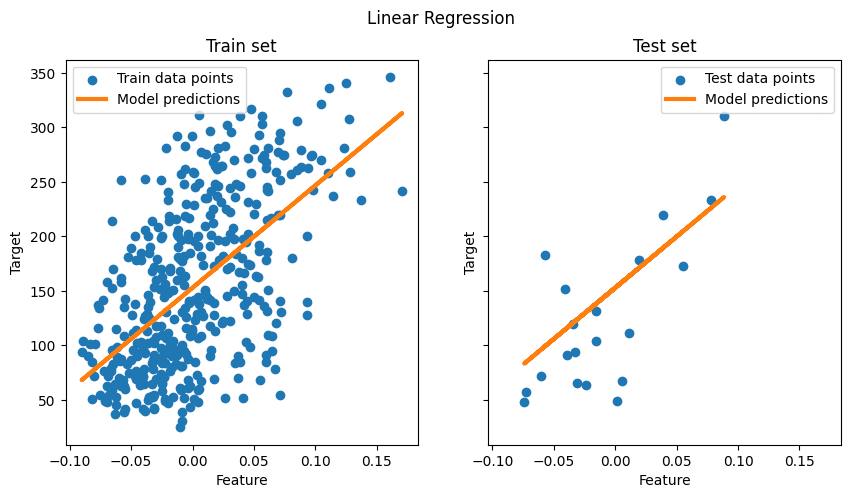

In [127]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

OLS on this single-feature subset learns a linear function that minimizes the mean squared error on the training data. We can see how well (or poorly) it generalizes by looking at the R^2 score and mean squared error on the test set. In higher dimensions, pure OLS often overfits, especially if the data is noisy. Regularization techniques can help reduce that.

### OLS and Ridge Regression Variance

Next, we illustrate the problem of high variance more clearly by using a tiny synthetic dataset. We sample only two data points, then repeatedly add small Gaussian noise to them and refit both OLS and Ridge. We plot each new line to see how much OLS can jump around, whereas Ridge remains more stable thanks to its penalty term.

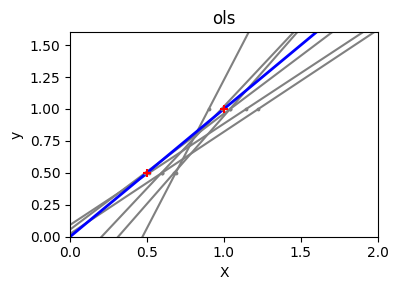

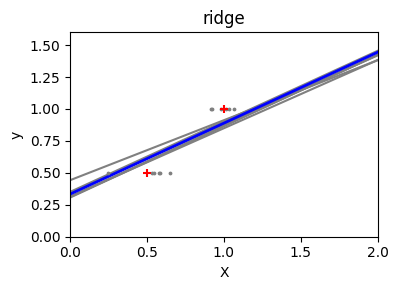

In [128]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

### Conclusion
* In the first example, we applied OLS to a real dataset, showing how a plain linear model can fit the data by minimizing the squared error on the training set.
* In the second example, OLS lines varied drastically each time noise was added, reflecting its high variance when data is sparse or noisy. By contrast, Ridge regression introduces a regularization term that shrinks the coefficients, stabilizing predictions.

Techniques like `Ridge` or `Lasso` (which applies an L1 penalty) are both common ways to improve generalization and reduce overfitting. A well-tuned Ridge or Lasso often outperforms pure OLS when features are correlated, data is noisy, or sample size is small.

# Non-Negative Least Squares

It's possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities (such as frequency counts or prices of goods). `LinearRegression` accepts a boolean `positive` parameter: when set to `True` Non-Negative Least Squares are then applied.

## Non-Negative Least Squares Example

In this example, we fit a linear model with positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression.

Generate some random data

In [129]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Split the data in train set and test set

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Fit the Non-Negative least squares.

In [131]:
reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Fit an OLS

In [132]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.743692629170035


Comparing the regression coefficients between OLS and NNLS, we can observe that they are highly correlated (the dashed line is the identity relation), but the non-negative constraint shrinks some to 0. The Non-Negative Least Squares inherently yield sparse results.

Text(0, 0.5, 'NNLS regression coefficients')

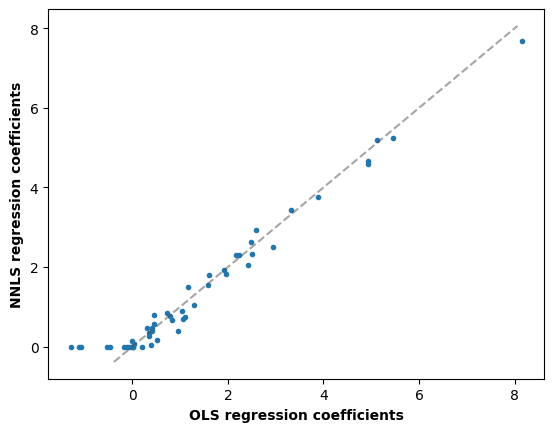

In [133]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

# OLS Complexity

The least squares solution is computed using the singular value decomposition of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math>. If <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>X</mi>
</math> is a matrix of shape `(n_samples, n_features)` this method has a cost of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>O</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>samples</mtext>
    </mrow>
  </msub>
  <msubsup>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>features</mtext>
    </mrow>
    <mn>2</mn>
  </msubsup>
  <mo stretchy="false">)</mo>
</math>, assuming that <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>samples</mtext>
    </mrow>
  </msub>
  <mo>&#x2265;</mo>
  <msub>
    <mi>n</mi>
    <mrow data-mjx-texclass="ORD">
      <mtext>features</mtext>
    </mrow>
  </msub>
</math>.

# Ridge Regression and Classification

## Regression

`Ridge` regression assumes some of the problems of OLS by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </munder>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>X</mi>
  <mi>w</mi>
  <mo>&#x2212;</mo>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
  <mo>+</mo>
  <mi>&#x3B1;</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msubsup>
    <mo stretchy="false">|</mo>
    <mn>2</mn>
    <mn>2</mn>
  </msubsup>
</math>

The complexity parameter <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B1;</mi>
  <mo>&#x2265;</mo>
  <mn>0</mn>
</math> controls the amount of shrinkage: the larger the value is, the greater amount of shrinkage and thus the coefficients become more robust to collinearity.

![Alt image](../images/sphx_glr_plot_ridge_path_001.png)

As with other linear models, `Ridge` will take in its `fit` method arrays `X`, `y` and will store the coefficients <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>w</mi>
</math> of the linear model in its `coef_` member:

In [134]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

print(reg.coef_)
print(reg.intercept_)

[0.34545455 0.34545455]
0.13636363636363638


Note that the class `Ridge` allows for the user to specify that the solver be automatically chosen by setting `solver="auto"`. When this option is specified, `Ridge` will choose between the `"lbfgs"`, `"cholesky"`, and `"sparse_cg"` solvers. `Ridge` will begin checking the conditions shown in the following table from top to bottom. If the condition is true, the corresponding solver is chosen.

| Solver | Condition |
|---------|-----------|
| 'lbfgs' | The `positive=True` option is specified. |
| 'cholesky' | The input array X is not sparse. |
| 'sparse_cg' | None of the above conditions are fulfilled. |


## Example: Plot Ridge Coefficients as a Function of the Regularization

Shows the effect of collinearity in the coefficients of an estimator.

`Ridge` Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it's useful to set a certain regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the OLS, coefficients exhibit big oscillations. In practice it's necessary to tune alpha in such a way that a balance is maintained between both.

In [135]:
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

## Compute Paths

In [136]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

## Display Results

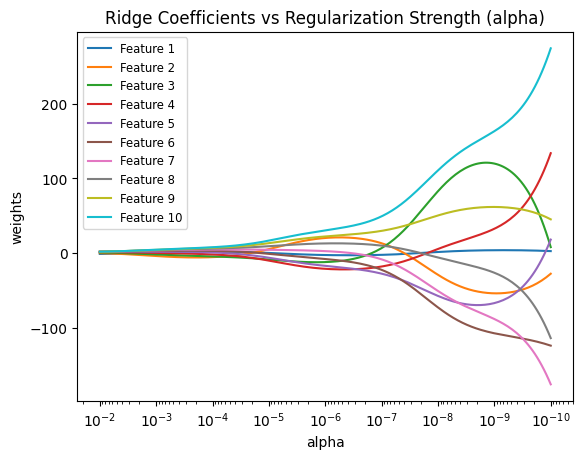

In [137]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge Coefficients vs Regularization Strength (alpha)")
plt.axis("tight")
plt.legend(
    [f"Feature {i + 1}" for i in range(X.shape[1])], loc="best", fontsize="small"
)
plt.show()

# Setting the Regularization Parameter: Leave-One-Out Cross-Validation

`RidgeCV` and `RidgeClassifierCV` implement ridge regression/classification with built-in cross-validation of the alpha parameter. They work in the same way as `GridSearchCV` except that is defaults to efficient Leave-One-Out cross-validation. When using the default cross-validation, alpha cannot be 0 due to the formulation used to calculate Leave-One-Out error.

Usage example:

In [138]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

,alphas,"array([1.e-06...e+05, 1.e+06])"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [139]:
reg.alpha_

np.float64(0.01)

Specifying the value of the cv attribute will trigger the use of cross-validation with `GridSearchCV`, for example `cv=10` for 10-fold cross-validation, rather than Leave-One-Out cross-validation.

# Lasso

The `Lasso` is a linear model that estimates sparse coefficients. It's useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are fundamental to the field of **compressed sensing** (I have no idea what that is). Under certain conditions, it can recover the exact set of non-zero coefficients.

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <munder>
    <mo data-mjx-texclass="OP" movablelimits="true">min</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>w</mi>
    </mrow>
  </munder>
  <mrow data-mjx-texclass="ORD">
    <mfrac>
      <mn>1</mn>
      <mrow>
        <mn>2</mn>
        <msub>
          <mi>n</mi>
          <mrow data-mjx-texclass="ORD">
            <mtext>samples</mtext>
          </mrow>
        </msub>
      </mrow>
    </mfrac>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mi>X</mi>
    <mi>w</mi>
    <mo>&#x2212;</mo>
    <mi>y</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <msubsup>
      <mrow data-mjx-texclass="ORD">
        <mo stretchy="false">|</mo>
      </mrow>
      <mn>2</mn>
      <mn>2</mn>
    </msubsup>
    <mo>+</mo>
    <mi>&#x3B1;</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <mi>w</mi>
    <mrow data-mjx-texclass="ORD">
      <mo stretchy="false">|</mo>
    </mrow>
    <msub>
      <mo stretchy="false">|</mo>
      <mn>1</mn>
    </msub>
  </mrow>
</math>

The lasso estimate thus solves the minimization of the least-squares penalty with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B1;</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mo stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
</math> added, where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B1;</mi>
</math> is a constant and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">|</mo>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow data-mjx-texclass="ORD">
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mo stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
</math> is the  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x2113;</mi>
    <mn>1</mn>
  </msub>
</math>-norm of the coefficient vector.

The implementation in the class `Lasso` uses coordinate descent as the algorithm to fit the coefficients.

In [140]:
re4g = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

,alphas,"array([1.e-06...e+05, 1.e+06])"
,fit_intercept,True
,scoring,None
,cv,None
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [141]:
reg.predict([[1, 1]])

array([0.54545455])

The function `lasso-path` is useful for lower-level tasks, as it computes the coefficients along the full path of possible values.

# Setting Regularization Parameter

The `alpha` parameter controls the degree of sparsity of the estimated coefficients.

## Using Cross-Validation

acikit-learn exposes objects that set the Lasso `alpha` parameter by cross-validation/: `LassoCV` and `LassoLarsCV`. `LassoLarsCV` is based on the Least Angle Regression algorithm explained below.

**For high-dimensional datasets with many collinear features, `LassoCV` is most often preferable**. However, `LassoLarsCV` has the advantage of exploring more relevant values of `alpha` parameter, and if the number of samples is very small compared to the number of features, it's often faster than `LassoCV`.

## Information-Criteria Based Model Selection

Alternatively, the estimator `LassoLarsIC` proposes to use the Akaike information criterion (AIC) and the Bayes Information criterion (BIC). It's a computationally cheaper alternative to find the optimal value of alpha as the regularization path is computed only once instead of k+1 times when using k-fold validation.

These criteria are computed on the in-sample training set. In short, they penalize the over-optimistic scored of the different Lasso models by their flexibility.

However, such criteria need a proper estimation of the degrees of freedom of the solution, are derived for large samples (asymptotic results) and assume the correct model is candidates under investigation. They also tend to break when the problem is badly conditioned (e.g. more features than samples).

## Example: Lasso Model Selection - AIC-BIC / Cross-Validation

[Resource](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py)

This example focuses on model selection for Lasso models that are linear models with an L1 penalty for regression problems.

Indeed, several strategies can be used to select the value of the regularization parameter: via cross-validation or using an information criterion, namely AIC or BIC.

### Dataset

In this example, we'll use the diabetes dataset.

In [142]:
from sklearn.datasets import load_diabetes
import pandas as pd

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In addition, we add some random features to the original data to better illustrate the feature selection performed by the Lasso model.

In [143]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 14
X_random = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
X = pd.concat([X, X_random], axis=1)
# Show only a subset of the columns
X[X.columns[::3]].head()

,age,bp,s3,s6,random_02,random_05,random_08,random_11
0,0.038076,0.021872,-0.043401,-0.017646,0.647689,-0.234137,-0.469474,-0.465730
1,-0.001882,-0.026328,0.074412,-0.092204,-1.012831,-1.412304,0.067528,0.110923
2,0.085299,-0.005670,-0.032356,-0.025930,-0.601707,-1.057711,0.208864,0.196861
3,-0.089063,-0.036656,-0.036038,-0.009362,-1.478522,1.057122,0.324084,0.611676
4,0.005383,0.021872,0.008142,-0.046641,0.331263,-0.185659,0.812526,1.003533


### Selecting Lasso via an Information Criterion

`LassoLarsIC` provides a Lasso estimator that uses the Akaike information criterion (AIC) or the Bayes information criterion (BIC) to select the optimal value of the regularization parameter alpha.

Before fitting the model, we will standardize the data with a `StandardScaler`. In addition, we will measure the time to fit and tune the hyperparameter alpha in order to compare with the cross-validation strategy.

We will first fit a Lasso model with the AIC criterion.

In [144]:
import time

from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

start_time = time.time()
lasso_lars_ic = make_pipeline(StandardScaler(), LassoLarsIC(criterion="aic")).fit(X, y)
fit_time = time.time() - start_time

print(lasso_lars_ic[-1]) # Just to show you why we're specifying [-1] index

LassoLarsIC()


We store the AIC metric for each value of alpha used during `fit`.

In [145]:
results = pd.DataFrame(
    {
        "alphas": lasso_lars_ic[-1].alphas_,
        "AIC criterion": lasso_lars_ic[-1].criterion_,
    }
).set_index("alphas")

alpha_aic = lasso_lars_ic[-1].alpha_

Now, we perform the same analysis using the BIC criterion.

In [146]:
lasso_lars_ic.set_params(lassolarsic__criterion="bic").fit(X, y)
results["BIC criterion"] = lasso_lars_ic[-1].criterion_
alpha_bic = lasso_lars_ic[-1].alpha_

We can check which value of `alpha` leads to the minimum AIC and BIC.

In [ ]:
def highlight_min(x):
    x_min = x.min()
    return ["font-weight: bold" if v == x_min else "" for v in x]


results.style.apply(highlight_min)

,AIC criterion,BIC criterion
alphas,,
45.160030,5244.764779,5244.764779
42.300343,5208.250639,5212.341949
21.542052,4928.018900,4936.201520
15.034077,4869.678359,4881.952289
6.189631,4815.437362,4831.802601
5.329616,4810.423641,4830.880191
4.306012,4803.573491,4828.121351
4.124225,4804.126502,4832.765671
3.820705,4803.621645,4836.352124


Finally, we can plot the AIC and BIC values for the different alpha values. The vertical lines in the plot correspond to the alpha chosen for each criterion. The selected alpha corresponds to the minimum of the AIC or BIC criterion.

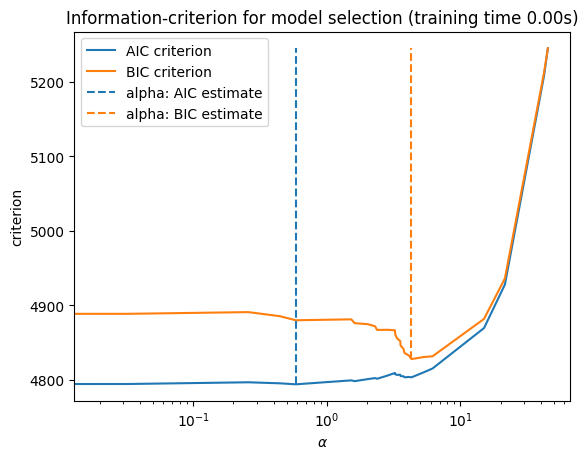

In [148]:
ax = results.plot()
ax.vlines(
    alpha_aic,
    results["AIC criterion"].min(),
    results["AIC criterion"].max(),
    label="alpha: AIC estimate",
    linestyles="--",
    color="tab:blue",
)
ax.vlines(
    alpha_bic,
    results["BIC criterion"].min(),
    results["BIC criterion"].max(),
    label="alpha: BIC estimate",
    linestyle="--",
    color="tab:orange",
)
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("criterion")
ax.set_xscale("log")
ax.legend()
_ = ax.set_title(
    f"Information-criterion for model selection (training time {fit_time:.2f}s)"
)

Model selection with an information-criterion is very fast. It relies on computing the criterion on the in-sample set provided to `fit`. Both criteria estimate the model generalization error based on the training set error and penalize this overly optimistic error. However, this penalty relies on a proper estimation of the degrees of freedom and the noise variance. Both are derived for large samples (asymptotic results) and assume the model is correct, i.e. that the data are actually generated by this model.

These models also tend to break when the problem is badly conditioned (more features than samples). It's then required to provide an estimate of the noise variance.

### Selecting Lasso Vis Cross-Validation

The Lasso estimator can be implemented with different solvers: coordinate descent and least angle regression. They differ with regards to their execution speed and sources of numerical errors.

In scikit-learn, two different estimators are available with integrated cross-validation: `LassoCV` and `LassoLarsCV` that respectively solve the problem with coordinate descent and least angle regression.

In the remainder of this section, we will present both approaches. For both algorithms, we will use a 20-fold cross-validation strategy.

### Lasso via Coordinate Descent

Let's start by making the hyperparameter tuning using `LassoCV`.

In [150]:
from sklearn.linear_model import LassoCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

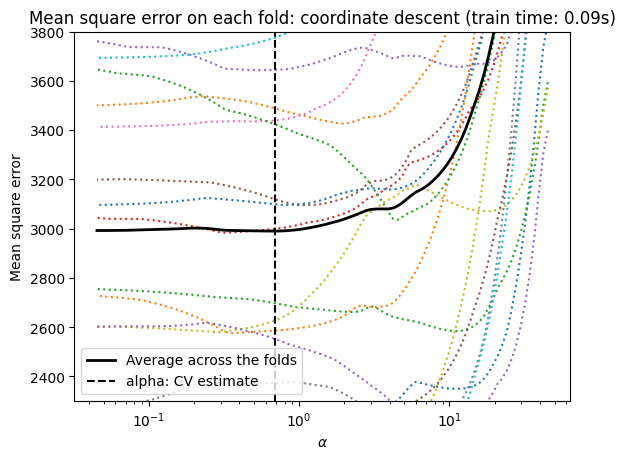

In [153]:
import matplotlib.pyplot as plt

ymin, ymax = 2300, 3800
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

### Lasso via Least Angle Regression

Let's start by making the hyperparameter tuning using `LassoLarsCV`.

In [154]:
from sklearn.linear_model import LassoLarsCV

start_time = time.time()
model = make_pipeline(StandardScaler(), LassoLarsCV(cv=20)).fit(X, y)
fit_time = time.time() - start_time

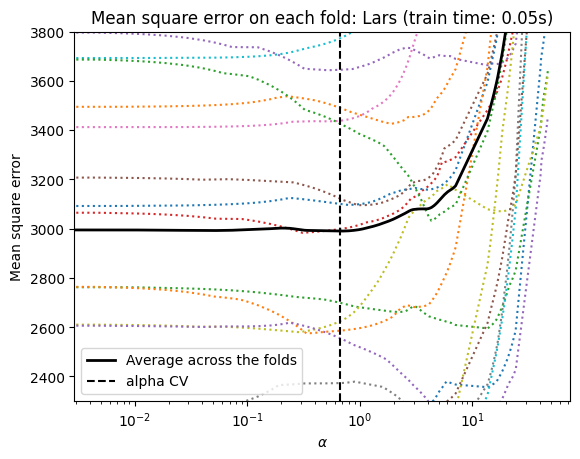

In [155]:
lasso = model[-1]
plt.semilogx(lasso.cv_alphas_, lasso.mse_path_, ":")
plt.semilogx(
    lasso.cv_alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha CV")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(f"Mean square error on each fold: Lars (train time: {fit_time:.2f}s)")

### Summary of Cross-Validation Approach

Both algorithms give roughly the same results.

Lars computes a solution path only for each kink in the path. As a result, it's very efficient when there are only a few kinks, which is the case if there are few features or samples. Also, it's able to compute the full path without setting any hyperparameter. On the opposite, coordinate descent computes the path points on a pre-specified grid (here we use the default). Thus, it's more efficient if the number of grid points is smaller than the number of kinks in the path. Such a strategy can be interesting if the number of features is really large and there are enough samples to be selected in each of the cross-validation fold. In terms of numerical errors, for heavily correlated variables, Lars will accumulate more errors, while the coordinate descent algorithm will only sample the path on a grid.

Note how the optimal value of alpha varies for each fold. This illustrates why nested cross-validation is a good strategy when trying to evaluate the performance of a method for which a parameter is chosen by cross-validation: this choice of parameter may not be optimal for a final evaluation on unseen test set only.

### Conclusion

In this tutorial, we presented two approaches for selecting the best hyperparameter `alpha`: one strategy finds the optimal value of `alpha` by only using the training set and some information criterion, and another strategy is based on cross-validation.

In this example, both approaches are working similarly. The in-sample hyperparameter selection even shows its efficacy in terms of computational performance. However, it can only be used when the number of samples is large enough compared to the number of features.

That's why hyperparameter optimization via cross-validation is a safe strategy: it works in different settings.

# Multi-Task Lasso